In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv(r"Data\train.csv")
test_data = pd.read_csv(r"Data\test.csv")



In [4]:
test_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,132523,132523,0.80,0,0,0,1,0,0,0,...,0,0,0,0,0,60.1,59.0,6.04,5.99,3.61
1,70210,70210,0.56,0,0,1,0,0,0,1,...,1,0,0,0,0,62.1,54.0,5.31,5.28,3.28
2,93051,93051,1.01,0,0,0,1,0,0,0,...,0,0,0,0,0,61.6,62.0,6.40,6.35,3.92
3,67325,67325,0.30,0,0,0,0,1,0,0,...,0,0,0,1,0,62.9,58.0,4.26,4.30,2.69
4,189522,189522,0.23,0,0,0,1,0,0,1,...,0,0,0,0,1,62.4,58.0,3.96,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,51474,51474,1.00,0,0,1,0,0,1,0,...,1,0,0,0,0,61.8,56.0,6.34,6.48,3.96
58068,50296,50296,0.73,0,0,1,0,0,0,1,...,0,0,0,0,0,62.1,57.0,5.74,5.77,3.58
58069,95077,95077,1.10,0,0,0,1,0,0,0,...,0,0,0,0,0,62.2,58.0,6.59,6.54,4.08
58070,71500,71500,0.91,0,0,0,1,0,0,1,...,0,1,0,0,0,58.0,60.0,6.42,6.35,3.71


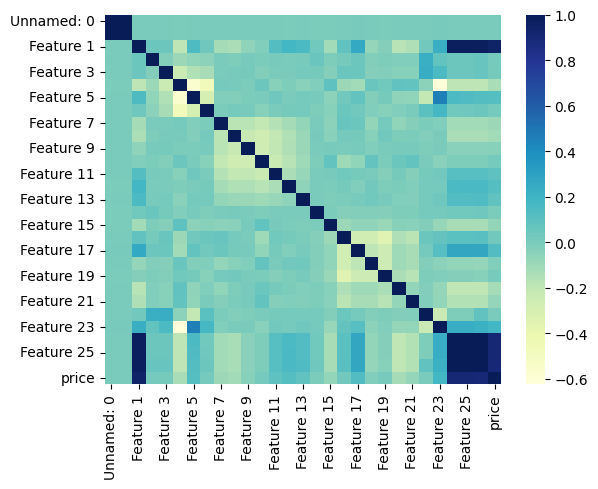

In [5]:
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu")

<Axes: xlabel='price', ylabel='Count'>

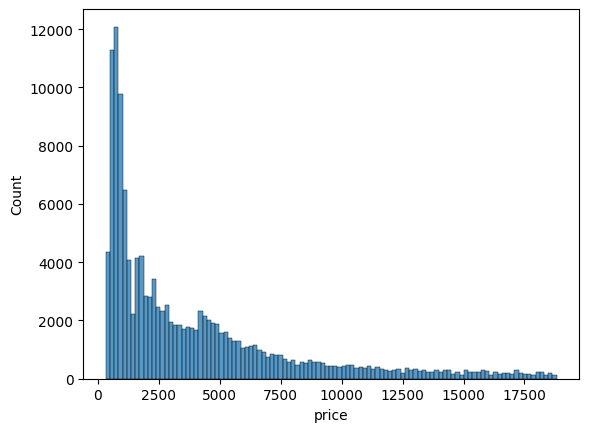

In [6]:
sns.histplot(train_data, x="price")

In [7]:
train_data.describe().T[['mean','min','max']]

,mean,min,max
Unnamed: 0,96855.699397,0.0,193572.00
id,96855.699397,0.0,193572.00
Feature 1,0.791073,0.2,3.50
Feature 2,0.010243,0.0,1.00
Feature 3,0.060915,0.0,1.00
Feature 4,0.477428,0.0,1.00
Feature 5,0.257415,0.0,1.00
Feature 6,0.193999,0.0,1.00
Feature 7,0.125143,0.0,1.00
Feature 8,0.185895,0.0,1.00


In [37]:
bin1 = [1250,4000,9000]

train_data["bin"] = 1

In [38]:
train_data.loc[(train_data['price'] > 1250) & (train_data['price'] < 4500),'bin'] = 2
train_data.loc[(train_data['price'] > 4500) & (train_data['price'] < 50000000),'bin'] = 3
#train_data.loc[(train_data['price'] > 9000),'bin'] = 4



In [39]:
train_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,bin
0,143728,143728,0.53,0,0,1,0,0,0,1,...,1,0,0,62.0,56.0,5.16,5.20,3.21,1656,2
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,63.8,56.0,4.89,5.02,3.18,1063,1
2,124407,124407,2.03,0,0,1,0,0,0,0,...,0,0,0,59.2,60.0,8.39,8.29,4.94,18508,3
3,45535,45535,0.33,0,0,1,0,0,0,1,...,1,0,0,61.5,55.0,4.41,4.47,2.73,723,1
4,178894,178894,0.90,0,1,0,0,0,0,0,...,1,0,0,63.6,59.0,6.04,6.08,3.86,3187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,34345,0.70,0,1,0,0,0,1,0,...,0,0,0,63.3,57.0,5.65,5.61,3.56,2380,2
135497,9899,9899,0.33,0,0,1,0,0,0,0,...,0,0,0,62.6,57.0,4.43,4.40,2.77,693,1
135498,142454,142454,2.03,0,0,0,1,0,0,0,...,1,0,0,59.7,59.0,8.38,8.30,4.97,16068,3
135499,129168,129168,0.73,0,1,0,0,0,0,1,...,1,0,0,63.2,59.0,5.67,5.72,3.61,2964,2


In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<Axes: xlabel='bin', ylabel='Count'>

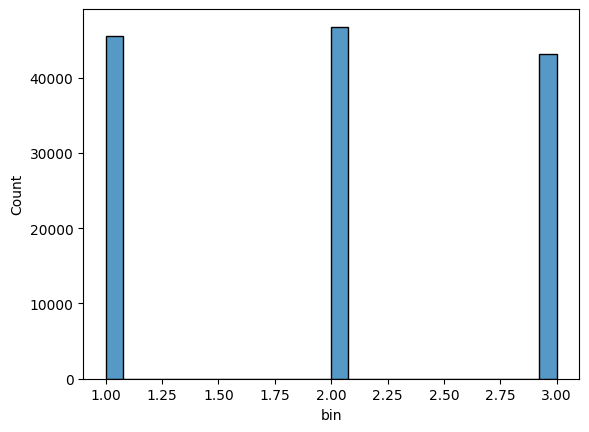

In [41]:
sns.histplot(train_data, x="bin")


In [42]:
col = list(train_data.columns)
col.remove('Unnamed: 0')
col.remove('id')
col.remove('price')
col.remove('bin')
col


['Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26']

In [43]:
target_variable = train_data['bin']
train_data_input = train_data[col]



In [44]:
classifier = DecisionTreeClassifier(max_depth=10)
#X_train ,X_test,y_train,y_test = train_test_split(train_data_input,target_variable, test_size=0.2, random_state=42)


In [45]:
classifier.fit(train_data_input,target_variable)

DecisionTreeClassifier(max_depth=10)

In [46]:
test_data_input = test_data[col]
test_data_input

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,0.80,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,60.1,59.0,6.04,5.99,3.61
1,0.56,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,62.1,54.0,5.31,5.28,3.28
2,1.01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,61.6,62.0,6.40,6.35,3.92
3,0.30,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,62.9,58.0,4.26,4.30,2.69
4,0.23,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,62.4,58.0,3.96,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,1.00,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,61.8,56.0,6.34,6.48,3.96
58068,0.73,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,62.1,57.0,5.74,5.77,3.58
58069,1.10,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,62.2,58.0,6.59,6.54,4.08
58070,0.91,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,58.0,60.0,6.42,6.35,3.71


In [47]:
y_pred = classifier.predict(test_data_input)

In [48]:
test_data['bin'] = y_pred


In [49]:
train_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,bin
0,143728,143728,0.53,0,0,1,0,0,0,1,...,1,0,0,62.0,56.0,5.16,5.20,3.21,1656,2
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,63.8,56.0,4.89,5.02,3.18,1063,1
2,124407,124407,2.03,0,0,1,0,0,0,0,...,0,0,0,59.2,60.0,8.39,8.29,4.94,18508,3
3,45535,45535,0.33,0,0,1,0,0,0,1,...,1,0,0,61.5,55.0,4.41,4.47,2.73,723,1
4,178894,178894,0.90,0,1,0,0,0,0,0,...,1,0,0,63.6,59.0,6.04,6.08,3.86,3187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,34345,0.70,0,1,0,0,0,1,0,...,0,0,0,63.3,57.0,5.65,5.61,3.56,2380,2
135497,9899,9899,0.33,0,0,1,0,0,0,0,...,0,0,0,62.6,57.0,4.43,4.40,2.77,693,1
135498,142454,142454,2.03,0,0,0,1,0,0,0,...,1,0,0,59.7,59.0,8.38,8.30,4.97,16068,3
135499,129168,129168,0.73,0,1,0,0,0,0,1,...,1,0,0,63.2,59.0,5.67,5.72,3.61,2964,2


In [50]:
test_data.to_csv('./Data/test_data_binned.csv')



In [30]:
train_data.to_csv('./Data/train_data_binned.csv')